# Using Pima India diabetes data, predict with 7% accuracy or more, the likelihood that a person would develop diabetes.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [10]:
df = pd.read_csv('pima-data.csv')
df.shape

(768, 10)

In [12]:
#df.isnull().values.any() # to check if there are null values or use
#df.isna().sum()  # to display the features znd count of rows with null entries
# alternative to onehot encoding on label 
#y_map = [True: 1, False: 0]
#y = df['label'].map(y_map)

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [14]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### check for null values

In [15]:
df.isnull().values.any()

False

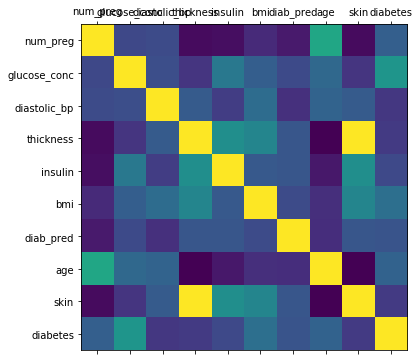

In [22]:
def plot_cor(df, size=11):
    """Plots a graphical correlation matrix for each pairs of columns in the dataframe.
    
    Inputs:
        df: panda dataframe,
        size: horizontal and vertical sizes of the plot
        
    Diaplays:
        Matrix of correlation between columns
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(np.arange(len(corr.columns)), corr.columns)
    plt.yticks(np.arange(len(corr.columns)), corr.columns)
    

plot_cor(df, 6)

In [23]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


### Remove strongly correlated columns

In [24]:
del df['skin']

In [25]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


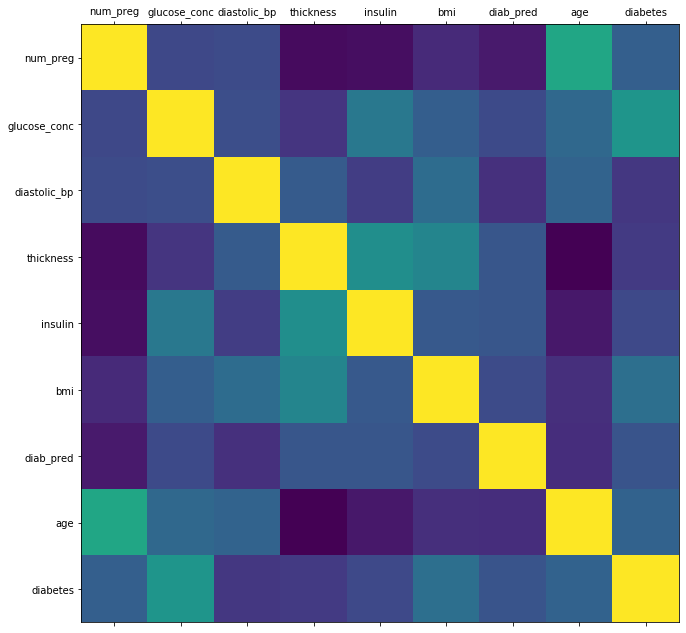

In [26]:
 # verify correlation is gone
plot_cor(df)

In [28]:
# change label class from true/false to 1/0
diabetes_map = {True:1, False: 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [29]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check true/false ratio

In [33]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

print(f'Number of true cases {num_true/(num_true + num_false) * 100}%')
print(f'Number of false cases {num_false/(num_true + num_false) * 100}%')

Number of true cases 34.89583333333333%
Number of false cases 65.10416666666666%


### Split dataset into training and test by 70/30 ratio

In [42]:
from sklearn.model_selection import train_test_split

feature_column_names = df.iloc[:, :8]
predicted_class_column = df['diabetes']

In [43]:
feature_column_names.shape

(768, 8)

In [44]:
feature_column_names

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [39]:
predicted_class_column.shape

(768,)

In [40]:
predicted_class_column

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [45]:
x = feature_column_names.values
y = predicted_class_column.values

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)  # 30% test

In [71]:
# ensure 30-70 split
print(f'{len(x_train)/len(df.index) *100}% on training set')
print(f'{len(x_test)/len(df.index) *100}% on test set')

69.921875% on training set
30.078125% on test set


 ### Post Split Data preparation

In [72]:
# How many rows have unexpected 0 values
print(f'Rows in dataframe {len(df)}')
print(f'Rows missing glucose_conc {len(df.loc[df["glucose_conc"] == 0])}')
print(f'Rows missing diastolic_bp {len(df.loc[df["diastolic_bp"] == 0])}')
print(f'Rows missing thickness {len(df.loc[df["thickness"] == 0])}')
print(f'Rows missing insulin {len(df.loc[df["insulin"] == 0])}')
print(f'Rows missing bmi {len(df.loc[df["bmi"] == 0])}')
print(f'Rows missing diab_pred {len(df.loc[df["diab_pred"] == 0])}')
print(f'Rows missing age {len(df.loc[df["age"] == 0])}')

Rows in dataframe 768
Rows missing glucose_conc 5
Rows missing diastolic_bp 35
Rows missing thickness 227
Rows missing insulin 374
Rows missing bmi 11
Rows missing diab_pred 0
Rows missing age 0


### Impute Missing Data with the Mean

In [73]:
from sklearn.impute import SimpleImputer
# impute with mean of all 0 readings

fill_0 = SimpleImputer(missing_values=0, strategy='mean')

X_train = fill_0.fit_transform(x_train)
X_test = fill_0.fit_transform(x_test)

### Training Initial Algorithm - Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

In [77]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance on Training Data

In [85]:
from sklearn.metrics import accuracy_score

nb_predict_train = nb_model.predict(X_train)

In [86]:
print(f'Accuracy score: {accuracy_score(y_train, nb_predict_train)}')

Accuracy score: 0.7541899441340782


### Performance on Test Data

In [88]:
nb_predict_test = nb_model.predict(X_test)

In [89]:
print(f'Accuracy score: {accuracy_score(y_test, nb_predict_test)}')

Accuracy score: 0.7359307359307359


### Confusion Matrix

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

In [95]:
print("Confusion Matrix")
print(confusion_matrix(y_test, nb_predict_test))
print('')
print('Classification Report')
print(classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



### Improving Performance with Random Forest Algorithm

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Predict Training Data

In [102]:
rf_predict_train = rf_model.predict(X_train)
print(f'Accuracy Score: {accuracy_score(y_train, rf_predict_train)}')

Accuracy Score: 1.0


### Predict Test Data

In [103]:
rf_predict_test = rf_model.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, rf_predict_test)}')

Accuracy Score: 0.7402597402597403


In [105]:
print("Confusion Matrix")
print(confusion_matrix(y_test, rf_predict_test))
print('')
print('Classification Report')
print(classification_report(y_test, rf_predict_test))

Confusion Matrix
[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



### Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs', C=0.7, class_weight='balanced', max_iter=1000, random_state=42)  # C = regularization hyperparameter 
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print(f'Accuracy Score: {accuracy_score(y_test, lr_predict_test)}')
print('Classification Report')
print(classification_report(y_test, lr_predict_test))

Accuracy Score: 0.7012987012987013
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231



### Tuning the C regularization hyperparameter to obtain optimum result

first max of 0.6625 occured at C=0.4


Text(0, 0.5, 'Recall scores')

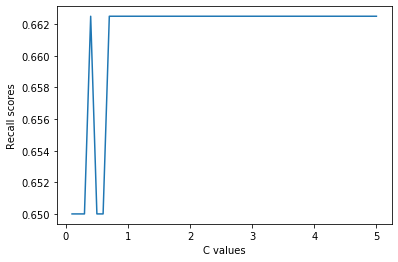

In [135]:
from sklearn import metrics

c_start = 0.1
c_end = 5
c_inc = 0.1

c_values, recall_scores = [], []
c_val = c_start
best_recall_score = 0

while c_val < c_end:
    c_values.append(c_val)
    lr_model_loop = LogisticRegression(C=c_val, class_weight='balanced', max_iter=1000, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_test_loop = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_test_loop)
    recall_scores.append(recall_score)
    if recall_score > best_recall_score:
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_test_loop
    c_val += c_inc

best_score_c_val = c_values[recall_scores.index(best_recall_score)]
print(f'first max of {best_recall_score} occured at C={best_score_c_val}')

plt.plot(c_values, recall_scores, '-')
plt.xlabel('C values')
plt.ylabel('Recall scores')

In [136]:
# handling class imbalance
# from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=best_score_c_val, class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model_loop.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_test, lr_predict_test)}')
print('Classification Report')
print(classification_report(y_test, lr_predict_test))
print(f'Recall Score: {metrics.recall_score(y_test, lr_predict_test)}')

Accuracy Score: 0.7012987012987013
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231

Recall Score: 0.6625


### Implementing Cross Validation

In [141]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, refit=False, cv=10, class_weight='balanced')
lr_cv_model.fit(X_test, y_test)
lr_cv_predict_test = lr_cv_model.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_test, lr_cv_predict_test)}')
print('Classification Report')
print(classification_report(y_test, lr_cv_predict_test))
print(f'Recall Score: {metrics.recall_score(y_test, lr_cv_predict_test)}')

Accuracy Score: 0.7619047619047619
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       151
           1       0.63      0.75      0.69        80

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.78      0.76      0.77       231

Recall Score: 0.75
